# Support Vector Regression (SVR)
### Postions, Levels, and Salaries
### Predicting Salaries

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values  #levels
y = dataset.iloc[:, -1].values  #salaries

In [3]:
print(X) #2d array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y) #1d array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
#better to transform or reshape y to an 2d array
#this is because the standard scalar expects one unique format of X and y

y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
#apply standard scaler objects independently on the two values
#X and y have differnt means and standard deviations
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)



In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')#we need to choose the kernel to use
#train regressor on whole dataset
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [10]:
#we want to predict a value of 6.5
#we need to reverse Feature Scaling, remember we used two different scalers to the values

#regressor.predict(sc_X.transform([[6.5]])) #this will provide answer in range of scaler applied to y 

#we need to reverse the scale of the prediction(inverse transform method)
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

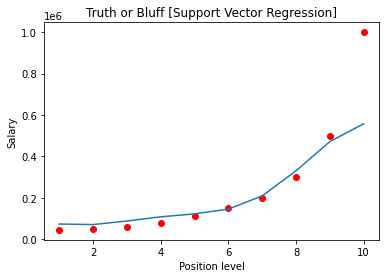

In [11]:
#reverse the values of X and y
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)))#don't apply sc_X here
plt.title('Truth or Bluff [Support Vector Regression]')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

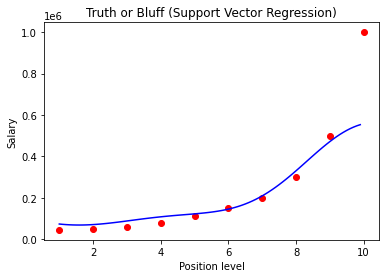

In [12]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')#transform applied and inverse_transform
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## NOTE: Beware of Outliers that are cut out when using SVR, they might be important data